## Geometric and intensity transformations

<ipython-input-1-274791301daf>:11: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  f = misc.ascent()  # retrieve a grayscale image


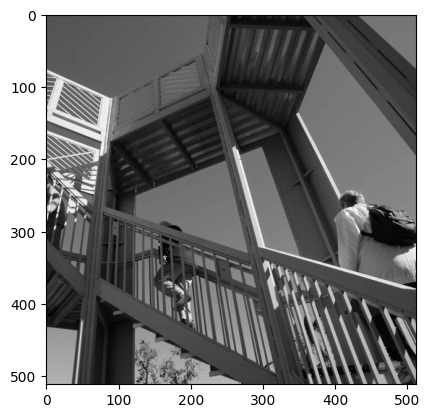

In [1]:
import scipy as sc
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
#install skimage: pip install scikit-image
import skimage
from skimage import transform

from scipy import ndimage
f = misc.ascent()  # retrieve a grayscale image
imshow(f, cmap=plt.cm.gray)

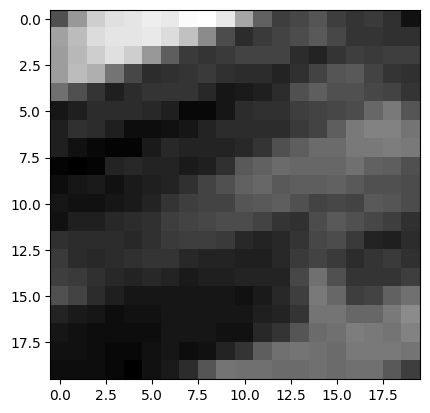

In [2]:
# Explore intensity variations
imshow(f[220:240, 110:130], cmap=plt.cm.gray, interpolation='nearest')

In [3]:
## Geometric transformations
lx, ly = f.shape
# Cropping
crop_f = f[lx // 4: - lx // 4, ly // 4: - ly // 4]
# up <-> down flip
flip_ud_f = np.flipud(f)
# rotation
rotate_f = ndimage.rotate(f, 45)
rotate_f_noreshape = ndimage.rotate(f, 45, reshaped=False)

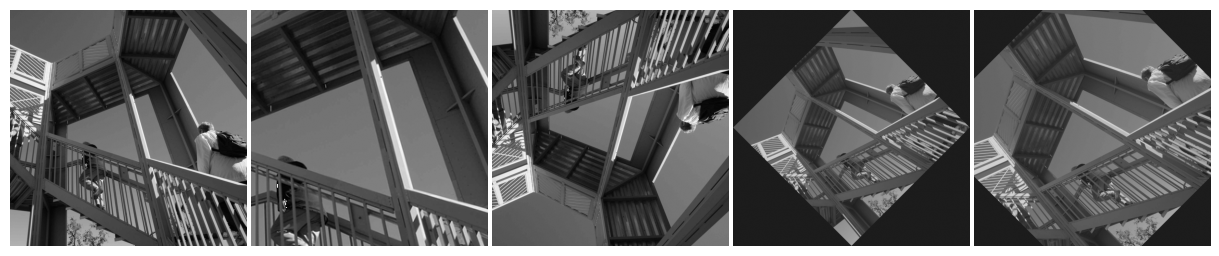

In [4]:

plt.figure(figsize=(12, 3))
plt.subplot(151)
imshow(f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(152)
imshow(crop_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(153)
imshow(flip_ud_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(154)
imshow(rotate_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(155)
imshow(rotate_f_noreshape, cmap=plt.cm.gray)
plt.axis('off')
plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0,
                    right=1)

plt.show()

### Translation

Text(0.5, 1.0, 'Translated image')

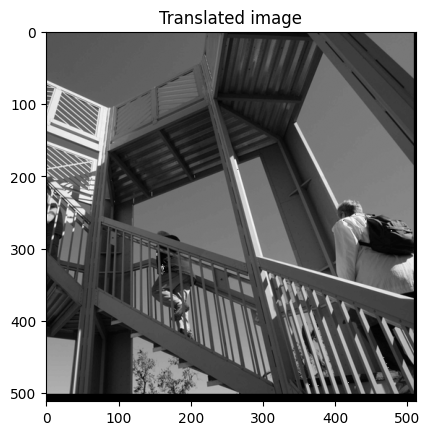

In [5]:
# Recall the shape of the transformation matrix
#[[a0  a1  a2]
# [b0  b1  b2]
# [0   0    1]]
# Lets translate by dx=3 and dy=10 pixels
transl=np.array([[1,0,3],[0,1,10],[0,0,1]])
transl=transl.reshape((3,3))
imshow(transl, cmap='gray')

tf=transform.AffineTransform(matrix=transl, scale=None, rotation=None, shear=None, translation=None)
transl=transform.warp(f, tf, order =1, preserve_range=True, mode='constant')
imshow(transl, cmap='gray')
plt.title("Translated image")

### Shear

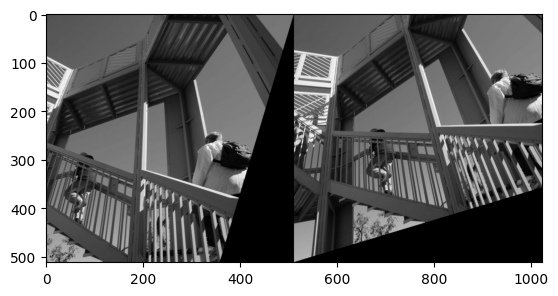

In [6]:
# horizontal
f=f/255.0 # scale to the pixel intensity range (0,1)
shear1=np.array([[1, 0.3 , 0.0],[0, 1, 0],[0,0,1]])
tf_h=transform.AffineTransform(matrix=shear1, scale=None, rotation=None, shear=None, translation=None)
im1=transform.warp(f, tf_h, order =1, preserve_range=True, mode='constant')
# vertical
shear2=np.array([[1, 0.0 , 0.0],[0.3, 1, 0],[0,0,1]])
tf_v=transform.AffineTransform(matrix=shear2, scale=None, rotation=None, shear=None, translation=None)
im2=transform.warp(f, tf_v, order =1, preserve_range=True, mode='constant')

plt.figure()
imshow(np.hstack([im1,im2]), cmap='gray')

In [7]:
tf_v

<AffineTransform(matrix=
    [[1. , 0. , 0. ],
     [0.3, 1. , 0. ],
     [0. , 0. , 1. ]]) at 0x7a50e41d8a10>

### Rescaling

In [8]:
f_rescaled=transform.rescale(f, 0.5, anti_aliasing=False)

Text(0.5, 1.0, 'Rescaled image by 50%')

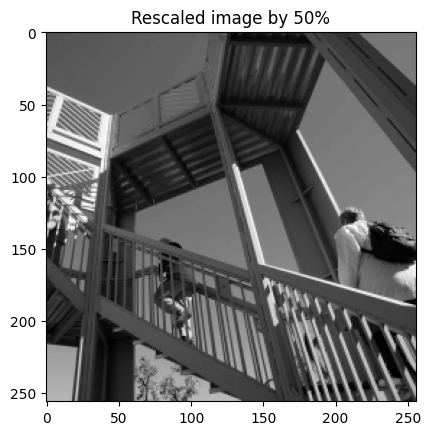

In [9]:
imshow(f_rescaled, cmap='gray')
plt.title("Rescaled image by 50%")

### Resizing

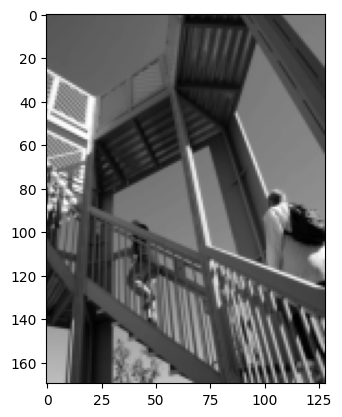

In [10]:
f_resized=transform.resize(f, (int(f.shape[0]/3), f.shape[1]/4), anti_aliasing=True)
imshow(f_resized, cmap='gray')

In [11]:
np.shape(f_resized)

(170, 128)

### Rotation with transform.rotate

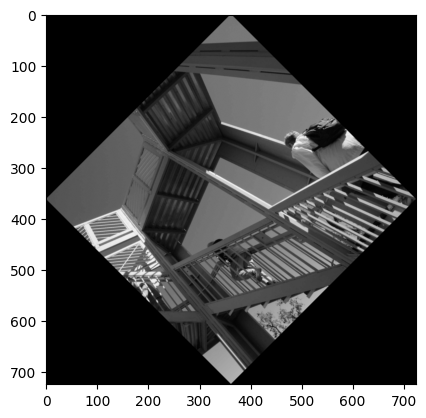

In [12]:
import math

tf=transform.rotate(f, 45, resize=True, mode='constant')
im=tf*255
imshow(im, cmap='gray')


### Question 1:
#### 1.  Using Python skimage.transform functions considered above, perform a horizontal shear by 0.2 and image rescaling by 50% on 'ascent' image (referred to as f).Display the final result.
#### 2. Define a translation matrix for shifting an image by 5 pixels in x-direction and by 10 pixels in y-direction, and apply AffineTransform to translate the image (f=ascent). Display the final result.
#### 3. Start with ascent image (f). Perform a consequent series of operations on an image f, rotate  an image by -45 degrees, then rescale the rotated image by 1.2 and crop it to the 50% of its central part.  


In [ ]:
### Horizontal shear by 0.2 and image rescaling by 50%

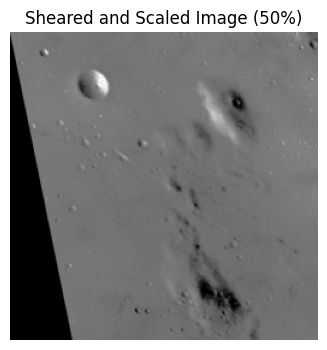

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform, data
from skimage import img_as_float

# Load the ascent image
image = data.moon()

# Horizontal shear by 0.2 using a different method
shear_transform = transform.AffineTransform(shear=0.2)
sheared_image = transform.warp(image, shear_transform, order=1, mode='constant', preserve_range=True)

# Rescale the image by 50% using a different scaling approach
scaled_image = transform.resize(sheared_image, (int(sheared_image.shape[0] * 0.5), int(sheared_image.shape[1] * 0.5)),
                               anti_aliasing=True, preserve_range=True)

# Display the result
plt.figure(figsize=(8, 4))
plt.imshow(scaled_image, cmap='gray')
plt.title("Sheared and Scaled Image (50%)")
plt.axis('off')
plt.show()


In [ ]:
#Shifting an image by 5 pixels in x-direction and by 10 pixels in y-direction, and apply AffineTransform to translate the image (f=ascent).

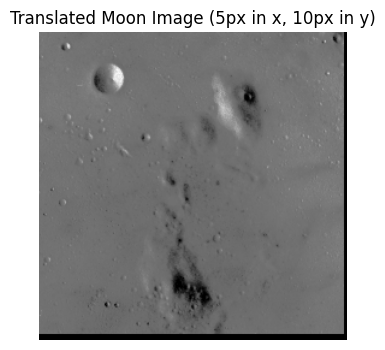

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform, data
from skimage import img_as_float

# Load the moon image from skimage's data module
image = data.moon()

# Create a translation transform
translation_transform = transform.AffineTransform(translation=(5, 10))

# Apply the translation to the image
translated_image = transform.warp(image, translation_transform, order=1, mode='constant', preserve_range=True)

# Display the result
plt.figure(figsize=(8, 4))
plt.imshow(translated_image, cmap='gray')
plt.title("Translated Moon Image (5px in x, 10px in y)")
plt.axis('off')
plt.show()


In [ ]:
#3. Start with ascent image (f). Perform a consequent series of operations on an image f, rotate an image by -45 degrees, then rescale the rotated image by 1.2 and crop it to the 50% of its central part.

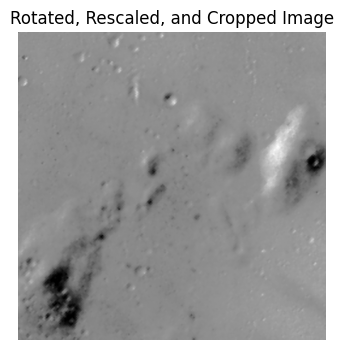

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform, data

# Load the ascent image
image = data.moon()  # Replace with the ascent image if needed

# Step 1: Rotate the image by -45 degrees
rotated_image = transform.rotate(image, -45, resize=True, mode='constant', preserve_range=True)

# Step 2: Rescale the rotated image by 1.2
rescaled_image = transform.rescale(rotated_image, 1.2, anti_aliasing=True, preserve_range=True)

# Step 3: Crop the central 50% of the rescaled image
center_x, center_y = rescaled_image.shape[1] // 2, rescaled_image.shape[0] // 2
crop_width, crop_height = rescaled_image.shape[1] // 2, rescaled_image.shape[0] // 2
cropped_image = rescaled_image[center_y - crop_height // 2:center_y + crop_height // 2,
                               center_x - crop_width // 2:center_x + crop_width // 2]

# Display the result
plt.figure(figsize=(8, 4))
plt.imshow(cropped_image, cmap='gray')
plt.title("Rotated, Rescaled, and Cropped Image")
plt.axis('off')
plt.show()


### Gamma correction and log contrast adjustment

Text(0.5, 0, 'Pixel intensity')

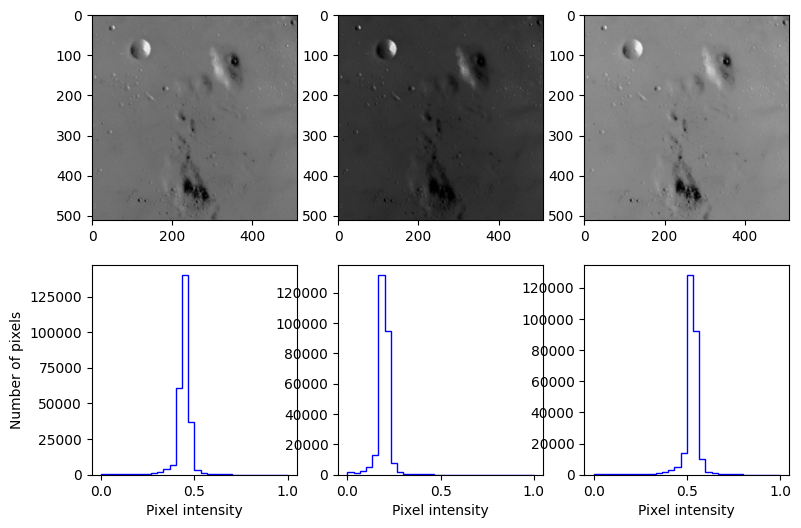

In [17]:
from skimage import data, img_as_float
from skimage import exposure

# Load a low-contrast image
im = data.moon()
im= img_as_float(im)

fig=plt.figure(figsize=(9,6))
axes = np.zeros((2, 3), dtype=object)
axes[0,0]=plt.subplot(2,3,1)
axes[0,1]=plt.subplot(2,3,2)
axes[0,2]=plt.subplot(2,3,3)

axes[1,0]=plt.subplot(2,3,4)
axes[1,1]=plt.subplot(2,3,5)
axes[1,2]=plt.subplot(2,3,6)
ax_im, ax_hist = axes

# Gamma corrected
gamma_corrected = exposure.adjust_gamma(im, 2)

# logarithmic corrected
logarithmic_corrected = exposure.adjust_log(im, 1)

#__________________________
# Display image
ax_im[0].imshow(im, cmap='gray')
#Display histogram for original image
ax_hist[0].hist(im.ravel(), bins=30, histtype='step', color='b' )
ax_hist[0].set_xlabel('Pixel intensity')
ax_hist[0].set_ylabel('Number of pixels')

ax_im[1].imshow(gamma_corrected, cmap='gray')
#Display histogram for gamma-corrected image
ax_hist[1].hist(gamma_corrected.ravel(), bins=30, histtype='step', color='b' )
ax_hist[1].set_xlabel('Pixel intensity')

ax_im[2].imshow(logarithmic_corrected, cmap='gray')
#Display histogram for gamma-corrected image
ax_hist[2].hist(logarithmic_corrected.ravel(), bins=30, histtype='step', color='b' )
ax_hist[2].set_xlabel('Pixel intensity')


### Question 2:
1. Describe the effect of Gamma-correction on the distribution of pixel intensities.
2. How does logarithmic transformation improve the quality of an image?
3. Perform Gamma-transformation of the moon image with the value of  $\gamma$ < 1. What effect do you observe on pixel intensities of the original image? How is you result compared against Gamma-corrected pixel intensities obtained with $\gamma$=2?


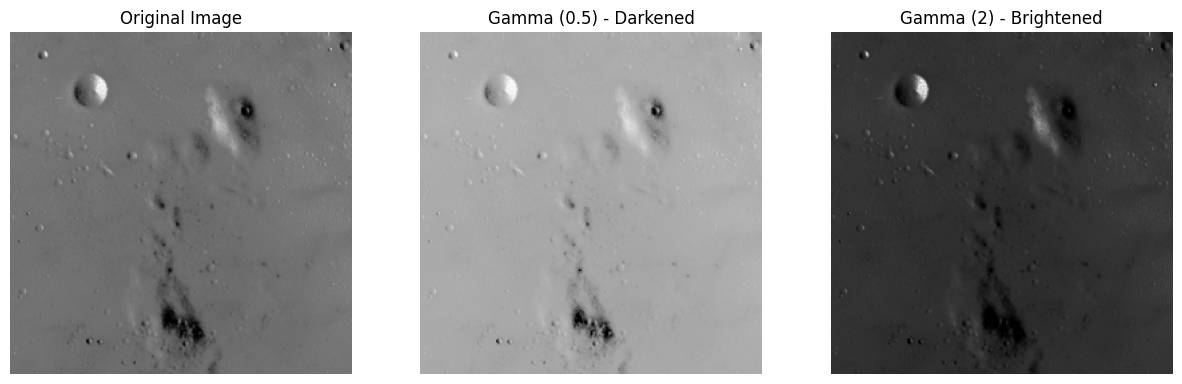

In [18]:
# Leave your answer here
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage import exposure

# Load the moon image and convert it to float
image = data.moon()
image = img_as_float(image)

# Gamma correction with gamma = 0.5 (darkening)
gamma_dark = exposure.adjust_gamma(image, 0.5)

# Gamma correction with gamma = 2 (brightening)
gamma_bright = exposure.adjust_gamma(image, 2)

# Plot the original and gamma-corrected images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original image
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Image with gamma = 0.5 (darkened)
axes[1].imshow(gamma_dark, cmap='gray')
axes[1].set_title('Gamma (0.5) - Darkened')
axes[1].axis('off')

# Image with gamma = 2 (brightened)
axes[2].imshow(gamma_bright, cmap='gray')
axes[2].set_title('Gamma (2) - Brightened')
axes[2].axis('off')

plt.show()



By nonlinearly scaling pixel values, gamma correction modifies brightness: an image is brightened if 𝛾 > 1  and darkened if 𝛾 < 1.

In low-contrast photos, logarithmic transformation improves contrast and brings out details by compressing bright areas and enhancing dark ones.
